Transfer learning is a machine learning technique where a model trained on one task is re-purposed on a second related task. It's particularly useful when you have a small dataset for the task you want to solve, but a large dataset is available for a related task.

The idea is to use the knowledge gained while solving the first task to help solve the second task. This can lead to improved performance and faster training times compared to training a model from scratch on the second task.

In transfer learning, the pre-trained model is typically used as a feature extractor. The early layers of the pre-trained model, which capture general features, are frozen (not updated) while training on the new task, while the later layers are modified or retrained to adapt to the new task. This allows the model to learn task-specific features while leveraging the knowledge from the pre-trained model.

Transfer learning has been successfully applied in various domains such as computer vision (e.g., image classification, object detection), natural language processing (e.g., text classification, language translation), and speech recognition.

Transfer learning involves two main steps:

- **Pre-training**: A model is trained on a source task using a large dataset. This task is typically unrelated or indirectly related to the target task. The pre-training step enables the model to learn generic features or representations that capture useful patterns in the data.
- **Fine-tuning**: The pre-trained model is then used as a starting point for training on the target task. The model is further trained on a smaller, task-specific dataset related to the target task. During fine-tuning, the model's parameters are updated to adapt to the specifics of the new task while preserving the previously learned knowledge.

There are different ways to perform transfer learning, depending on the availability of data and similarity between the source and target tasks:
- **Feature Extraction**: In this approach, the pre-trained model's layers are frozen, and only the output layers are replaced or added for the target task. The pre-trained model serves as a feature extractor, and the new layers are trained to map the extracted features to the target task's specific classes or labels.
- **Fine-tuning**: In this approach, both the pre-trained model's layers and the new layers are trained together on the target task. The initial layers of the pre-trained model can be frozen, while the deeper layers closer to the task-specific layers are fine-tuned. This allows the model to adapt the previously learned features to the target task.

Transfer learning is especially beneficial in scenarios where:

- The target task has a limited amount of labeled data, as transfer learning can effectively leverage knowledge from a larger source dataset.
- The source and target tasks share some common underlying patterns or features, allowing the model to transfer relevant knowledge.
- Training a model from scratch on the target task would be computationally expensive or time-consuming.

By utilizing transfer learning, models can achieve improved performance, faster convergence, and reduced data requirements, making it a valuable technique in various machine learning applications.

**How is Transfer Lerning done in CNN Models?**

Transfer learning in CNNs (Convolutional Neural Networks) typically involves using a pre-trained CNN model as a starting point and adapting it to a new task. Here are the steps involved in transfer learning using CNNs:

- **Pre-trained Model Selection:** Choose a pre-trained CNN model that has been trained on a large and diverse dataset, such as ImageNet. Popular choices include YOLO, VGG, ResNet, Inception, or MobileNet. These models have learned general image features that can be applicable to a wide range of tasks.
- **Removing the Classifier:** Remove the fully connected layers (classifier) at the end of the pre-trained model. These layers are task-specific and need to be replaced with new layers suitable for the new task.
- **Feature Extraction:** Freeze the weights of the pre-trained layers to prevent them from being updated during training. These layers already contain valuable learned features, and freezing them allows the model to act as a feature extractor.
- **Adding New Layers:** Add new layers on top of the pre-trained layers. These new layers will be specific to the new task. The number of new layers and their architecture can vary based on the complexity of the task and the available data.
- **Training:** Train the model using the new task-specific dataset. The training is performed on the new layers while keeping the pre-trained layers frozen. Only the weights of the new layers are updated during training.
- **Fine-tuning (Optional):** If the new task dataset is large enough and similar to the original dataset used for pre-training, fine-tuning can be performed. In this step, the weights of the pre-trained layers closest to the new layers are unfrozen, allowing them to be further fine-tuned along with the new layers. This fine-tuning enables the model to adapt more specifically to the new task.
- **Evaluation and Testing:** Evaluate the performance of the trained model on a validation set. Adjust the hyperparameters and model architecture if necessary. Once satisfied with the model's performance, test it on unseen data to assess its generalization ability.

## Transfer Learning using YOLO

YOLO is a popular object detection algorithm that can detect and classify objects in real-time. It has gained widespread recognition for its speed and accuracy, making it suitable for various applications, including autonomous vehicles, surveillance systems, and robotics. YOLO takes an input image and divides it into a grid, predicting bounding boxes and class probabilities for each grid cell.

### History of YOLO
YOLO was introduced in 2016 by Joseph Redmon, et al. Since its inception, several versions of YOLO have been developed, including YOLOv2, YOLOv3, YOLOv4, YOLOv5, YOLOv6, YOLOv7, YOLOv8 and it is still evolving. Each version aimed to improve object detection accuracy and speed.

### YOLO Model Architecture

Here we will talk about YOLO V4 model architecture. The YOLO V4 architecture consists of two main components: the backbone network and the detection network.

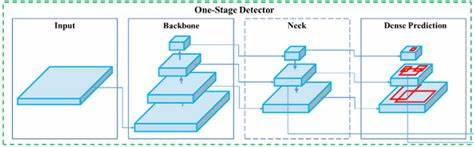

- **Backbone Network:** The backbone network is responsible for extracting features from the input image. It typically uses a convolutional neural network (CNN) such as DarkNet, which consists of several convolutional and pooling layers. The backbone network progressively reduces the spatial dimensions of the input while capturing meaningful features.

- **Detection Network:** The detection network takes the features extracted by the backbone network and performs object detection. It predicts bounding boxes and class probabilities for objects within each grid cell.

The detection network consists of the following components:

- 1x1 Convolutional Layers: These layers reduce the depth dimension of the input features.
- 3x3 Convolutional Layers: These layers detect objects at different scales and aspect ratios.
- Prediction Layers: Each prediction layer predicts bounding box coordinates and class probabilities. YOLO predicts bounding boxes as offsets from the grid cell boundaries.

For more visit this [link](https://iq.opengenus.org/yolov4-model-architecture/).

###  Input Format
The YOLO model requires input images of fixed size. Common input sizes include 416x416, 608x608, or 1024x1024 pixels. Larger input sizes generally lead to better detection accuracy but slower inference times.

### Output Format
The YOLO model outputs bounding box predictions and class probabilities. Each bounding box prediction consists of four coordinates (x, y, width, height) and an associated confidence score. Class probabilities represent the likelihood of each detected object belonging to a specific class.

## Implementation of Transfer Learning

TensorFlow provides a collection of pre-trained models through the `tf.keras.applications` module. For this example, we'll use the VGG16 model.

Here's a step-by-step guide to performing transfer learning using the CIFAR dataset:

Step 1:  Import the necessary libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten

Step 2: Load and preprocess the CIFAR dataset

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel value to the range of 0 and 1
x_train = x_train.astype('float32')/ 255
x_test = x_test.astype('float32')/ 255

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

Step 3: Load the pre-trained VGG16 model (excluding the fully connected layers) and freeze its weights

In [3]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))

# Freeze the pre-trained wiights
base_model.trainable = False

Step 4: Build your custom model on top of the pre-trained base model

In [4]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

Step 5: Compile and train the model

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=64, epochs=1, validation_data=(x_test, y_test))

782/782 ━━━━━━━━━━━━━━━━━━━━ 661s 841ms/step - accuracy: 0.4650 - loss: 1.5368 - val_accuracy: 0.5631 - val_loss: 1.2412


Step 6: Evaluate the model on the test set

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

298/313 ━━━━━━━━━━━━━━━━━━━━ 6s 432ms/step - accuracy: 0.5619 - loss: 1.2352

Step 7: Perform inference on new images

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load a new image for inference
new_image_path = './../../assets/test-image.jpg'
new_image = image.load_img(new_image_path, target_size=(32, 32))
new_image = image.img_to_array(new_image)
new_image = np.expand_dims(new_image, axis=0)
new_image = new_image / 255.0

# Perform inference
predictions = model.predict(new_image)
predicted_class = np.argmax(predictions)

print("Predicted Class:", predicted_class)

This process allows the model to leverage the pre-trained weights from VGG16 while training the added fully connected layers specifically for the CIFAR dataset. Feel free to modify the architecture or hyperparameters according to your needs.